## Exemplo Prático com tf.GradientTape() e Plotagem de Gráficos

Vou criar um exemplo completo que demonstra o uso de tf.GradientTape() para otimizar uma função matemática simples, com visualização do processo de otimização.

Exemplo: Encontrando o Mínimo da Função y = x²

2025-04-19 23:20:49.230269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Época 0: x = 2.40, y = 9.00, dy/dx = 6.00
Época 1: x = 1.92, y = 5.76, dy/dx = 4.80
Época 2: x = 1.54, y = 3.69, dy/dx = 3.84
Época 3: x = 1.23, y = 2.36, dy/dx = 3.07
Época 4: x = 0.98, y = 1.51, dy/dx = 2.46
Época 5: x = 0.79, y = 0.97, dy/dx = 1.97
Época 6: x = 0.63, y = 0.62, dy/dx = 1.57
Época 7: x = 0.50, y = 0.40, dy/dx = 1.26
Época 8: x = 0.40, y = 0.25, dy/dx = 1.01
Época 9: x = 0.32, y = 0.16, dy/dx = 0.81
Época 10: x = 0.26, y = 0.10, dy/dx = 0.64
Época 11: x = 0.21, y = 0.07, dy/dx = 0.52
Época 12: x = 0.16, y = 0.04, dy/dx = 0.41
Época 13: x = 0.13, y = 0.03, dy/dx = 0.33
Época 14: x = 0.11, y = 0.02, dy/dx = 0.26
Época 15: x = 0.08, y = 0.01, dy/dx = 0.21
Época 16: x = 0.07, y = 0.01, dy/dx = 0.17
Época 17: x = 0.05, y = 0.00, dy/dx = 0.14
Época 18: x = 0.04, y = 0.00, dy/dx = 0.11
Época 19: x = 0.03, y = 0.00, dy/dx = 0.09


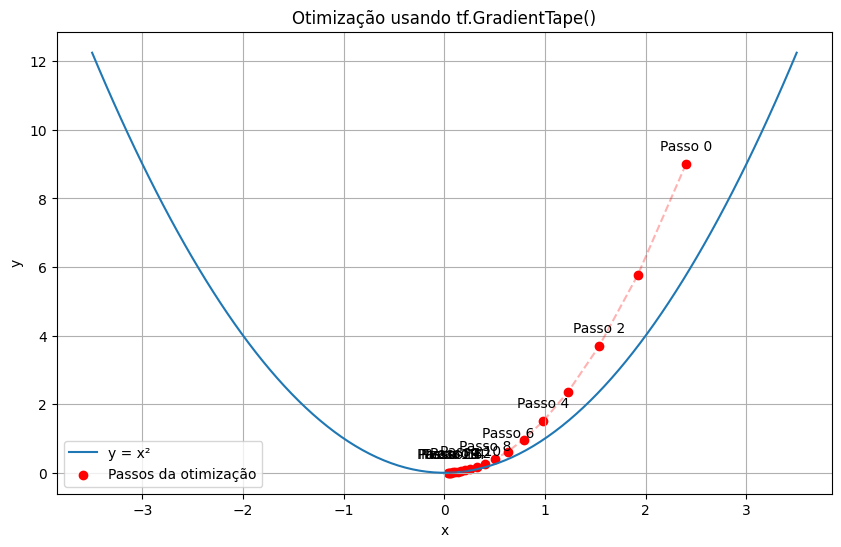

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Configurações iniciais
x = tf.Variable(3.0, dtype=tf.float32)  # Valor inicial de x
learning_rate = 0.1
epochs = 20
history = []

# Função que queremos minimizar: y = x²
def f(x):
    return x ** 2

# Otimização usando GradientTape
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y = f(x)  # Calcula o valor da função
        
    # Calcula o gradiente (derivada dy/dx)
    dy_dx = tape.gradient(y, x)
    
    # Atualiza x usando gradiente descendente
    x.assign_sub(learning_rate * dy_dx)
    
    # Armazena os valores para plotagem
    history.append((x.numpy(), y.numpy()))
    
    print(f"Época {epoch}: x = {x.numpy():.2f}, y = {y.numpy():.2f}, dy/dx = {dy_dx.numpy():.2f}")

# Preparando dados para o gráfico
x_vals = np.linspace(-3.5, 3.5, 100)
y_vals = x_vals ** 2
history_x, history_y = zip(*history)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='y = x²')
plt.scatter(history_x, history_y, c='red', label='Passos da otimização')
plt.plot(history_x, history_y, 'r--', alpha=0.3)

# Adicionando anotações para alguns pontos
for i, (x_p, y_p) in enumerate(history):
    if i % 2 == 0 or i == len(history)-1:
        plt.annotate(f'Passo {i}', (x_p, y_p), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Otimização usando tf.GradientTape()')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Exemplo com Rede Neural Simples

Vamos estender para um exemplo com uma pequena rede neural:

Época 0: Loss = 170.4290
Época 1: Loss = 127.5369
Época 2: Loss = 95.4874
Época 3: Loss = 72.0518
Época 4: Loss = 55.0483
Época 5: Loss = 42.6155
Época 6: Loss = 33.5746
Época 7: Loss = 27.1160
Época 8: Loss = 22.5210
Época 9: Loss = 19.1301
Época 10: Loss = 16.3427
Época 11: Loss = 13.6474
Época 12: Loss = 10.7509
Época 13: Loss = 7.6884
Época 14: Loss = 4.7452
Época 15: Loss = 2.3300
Época 16: Loss = 0.8048
Época 17: Loss = 0.4126
Época 18: Loss = 0.9561
Época 19: Loss = 1.7031
Época 20: Loss = 2.2053
Época 21: Loss = 2.2701
Época 22: Loss = 1.9172
Época 23: Loss = 1.3314
Época 24: Loss = 0.7471
Época 25: Loss = 0.3786
Época 26: Loss = 0.4591
Época 27: Loss = 0.8165
Época 28: Loss = 1.0181
Época 29: Loss = 0.8988
Época 30: Loss = 0.5282
Época 31: Loss = 0.1420
Época 32: Loss = 0.0717
Época 33: Loss = 0.2730
Época 34: Loss = 0.3898
Época 35: Loss = 0.3311
Época 36: Loss = 0.1934
Época 37: Loss = 0.1912
Época 38: Loss = 0.2905
Época 39: Loss = 0.3135
Época 40: Loss = 0.2035
Época 41: L

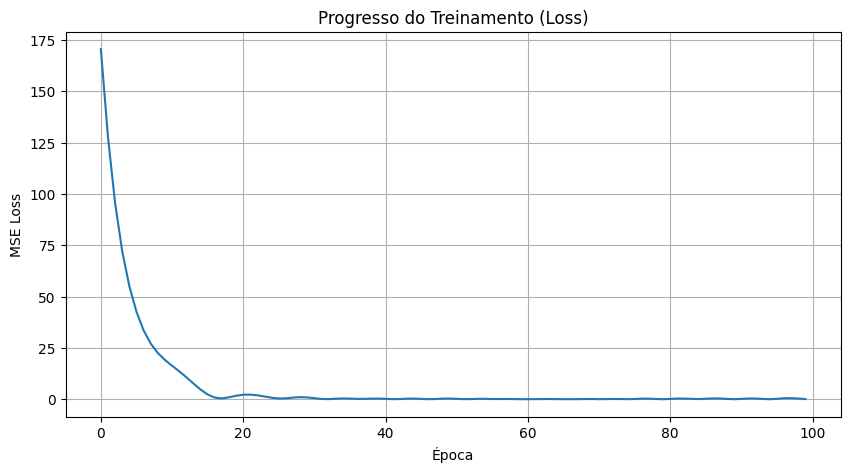

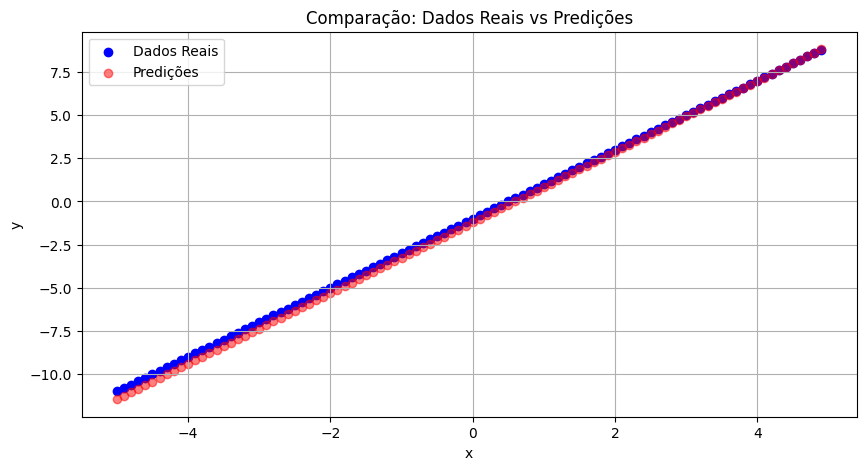


MSE Final: 0.0656


In [138]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras


# Dados
# x_train = np.linspace(-3, 3, 30, dtype=float) # np.arange(-5.0, 5.0, 0.1, dtype=float)
x_train = np.arange(-5.0, 5.0, 0.1, dtype=np.float32)

y_train = (2*x_train - 1).astype(np.float32)  # Relação linear simples

noise = np.random.normal(0, 0.1, y_train.shape)  # Ruído gaussiano
y_train_noise = (y_train + noise).astype(np.float32)

# # Dataset com batches
# batch_size = 64
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_noise))
# dataset = dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)

epochs = 100  # épocas

# Normalização dos dados (importante para redes neurais)
# x_mean, x_std = x_train.mean(), x_train.std()
# x_train_norm = (x_train - x_mean) / x_std

# Modelo melhorado
def create_improved_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation='linear', input_shape=(1,)),
        #tf.keras.layers.Dense(8, activation='sigmoid'),
        #tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Sem ativação para regressão
    ])
    return model

model = create_improved_model()

# Otimizador com learning rate mais baixo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

tipe_train = 1

if tipe_train == 0:
    # Treinamento com dados normais
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mse']
    )

    # 3. Treinar o modelo
    history = model.fit(
        x_train,
        y_train_noise, 
        epochs=epochs, 
        batch_size=len(x_train),
        verbose=1
    )
    # 6. Plotar a curva de aprendizado
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.title('Curva de Aprendizado')
    plt.xlabel('Época')
    plt.ylabel('Loss (MSE)')
    plt.grid(True)
    plt.show()
else:
# Treinamento
    losses = []
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model(x_train, training=True)
            # loss = keras.ops.mean(keras.ops.square(y_pred - y_train_noise))
            # loss = keras.ops.mean(keras.ops.square(y_train_noise - y_pred))            
            loss = keras.losses.mean_squared_error(y_train_noise, y_pred)
            #print(f"loss: {loss}")
        
        gradients = tape.gradient(loss, model.trainable_variables)
        #print(f"gradientes: {gradients}")
        # Normalização dos gradientes (opcional, para evitar explosão)
        gradients = [tf.clip_by_value(g, -1., 1.) for g in gradients]

        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        loss = tf.reduce_mean(loss)
        losses.append(loss.numpy())

        if epoch % 1 == 0:
            print(f"Época {epoch}: Loss = {loss.numpy():.4f}")


# Treinamento manual 
    # losses = []
    # for epoch in range(epochs):
    #     epoch_losses = []
    #     for x_batch, y_batch in dataset:
    #         with tf.GradientTape() as tape:
    #             y_pred = model(x_batch, training=True)
    #             loss = tf.reduce_mean(tf.square(y_pred - y_batch))
            
    #         gradients = tape.gradient(loss, model.trainable_variables)
    #         optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    #         epoch_losses.append(loss.numpy())
        
    #     avg_loss = np.mean(epoch_losses)
    #     losses.append(avg_loss)
    #     print(f"Época {epoch}: Loss = {avg_loss:.4f}")


    # Plot da curva de loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Progresso do Treinamento (Loss)')
    plt.xlabel('Época')
    plt.ylabel('MSE Loss')
    plt.grid(True)
    plt.show()



# Predições
predictions = model(x_train).numpy()

# Plot dos resultados
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, label='Dados Reais', color='blue')
plt.scatter(x_train, predictions, label='Predições', color='red', alpha=0.5)
plt.title('Comparação: Dados Reais vs Predições')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Métricas de desempenho
mse = tf.keras.losses.MeanSquaredError()
print(f"\nMSE Final: {mse(y_train, predictions).numpy():.4f}")

## exemplo completo de uma rede neural para estimar uma função de duas variáveis,

com visualização 3D da superfície real, dos dados treinamento (com ruído) e da superfície predita pelo modelo.

Exemplo: Estimação da Função z = sin(x) + cos(y) com Ruído

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


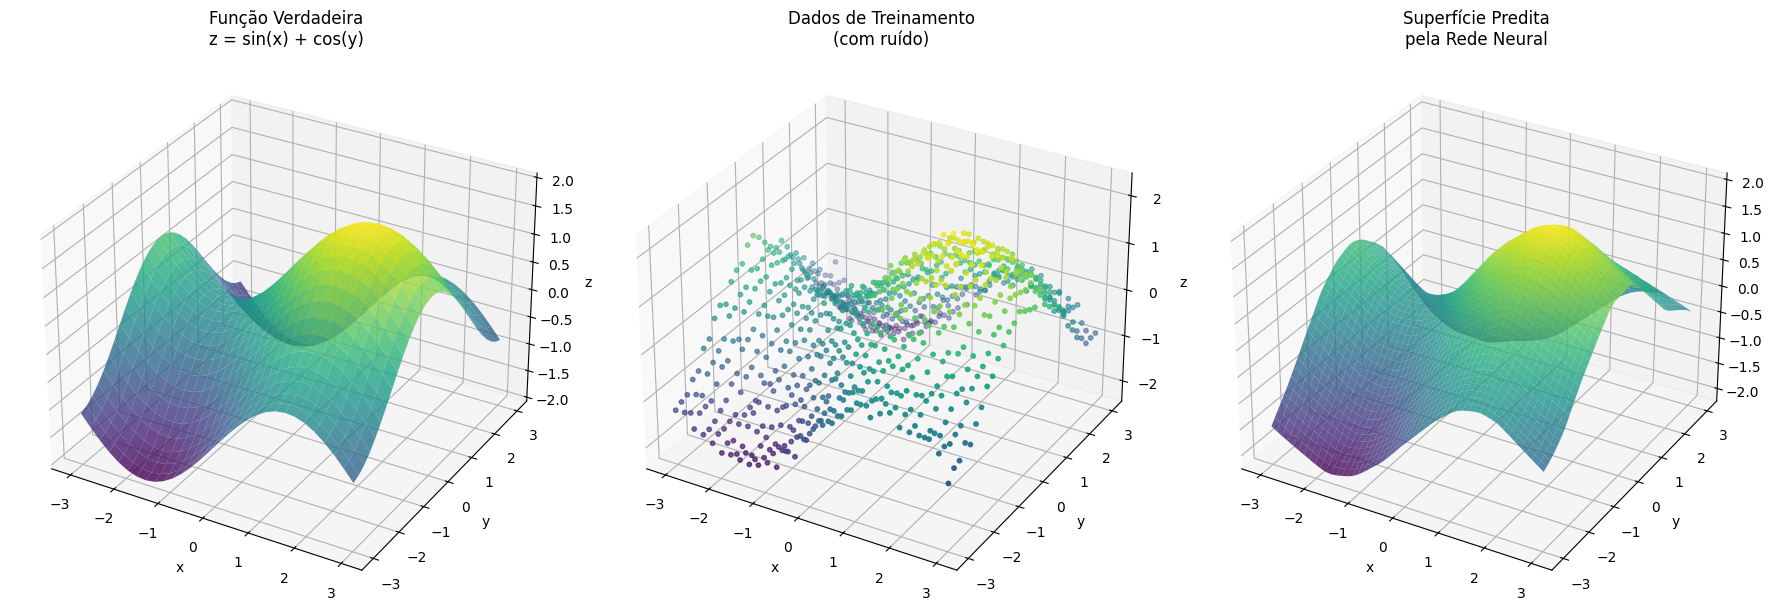

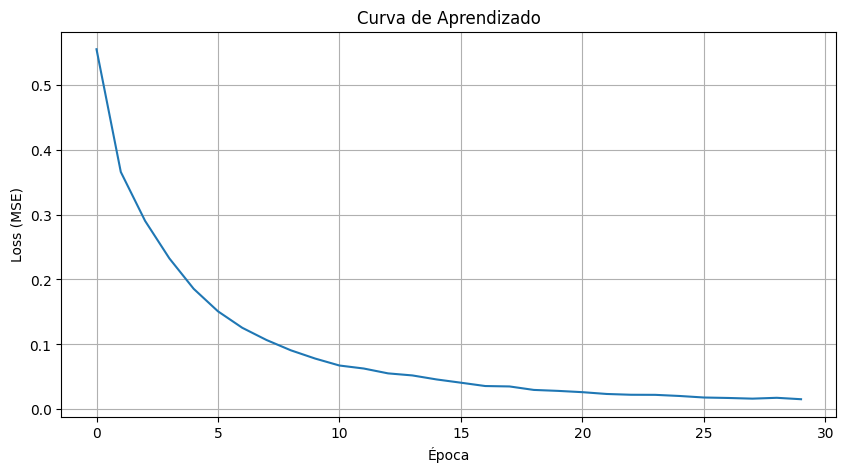

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Gerar dados de treinamento com ruído
def true_function(x, y):
    return np.sin(x) + np.cos(y)

# Gerar grid de pontos
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
x, y = np.meshgrid(x, y)

# Calcular z (com ruído)
z_true = true_function(x, y)
noise = np.random.normal(0, 0.1, z_true.shape)  # Ruído gaussiano
z_noisy = z_true + noise

# Preparar dados para a rede neural (formato flatten)
x_train = x.flatten()
y_train = y.flatten()
z_train = z_noisy.flatten()

# 2. Criar modelo de rede neural

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# Alternativa1: usando Sequential API
def create_model1():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

def create_model2():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model

# Alternativa: usando Functional API
def create_functional_model():
    inputs = tf.keras.Input(shape=(2,))
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Escolha uma das funções de criação de modelo
def create_model_reg():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    return model

# Escolha uma das funções de criação de modelo
# model = create_model1()
model = create_functional_model()
# model = create_model_reg()


#model.compile(optimizer='adam', loss='mse')

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['accuracy']
)

# Qual Escolher?
# Adam é um bom padrão para maioria dos casos.
# SGD com momentum pode ter melhor generalização em alguns problemas.
# RMSprop é bom para RNNs.
# AdamW para fine-tuning e weight decay explícito.

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 3. Treinar o modelo
history = model.fit(
    np.column_stack((x_train, y_train)), 
    z_train, 
    epochs=200, 
    batch_size=32,
    verbose=0,
    validation_split=0.2,
    # shuffle=True,
    # callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./logs')],
    callbacks=[early_stop]
)

# 4. Fazer previsões em um grid mais fino para plotagem
x_plot = np.linspace(-3, 3, 50)
y_plot = np.linspace(-3, 3, 50)
x_plot, y_plot = np.meshgrid(x_plot, y_plot)

z_pred = model.predict(np.column_stack((x_plot.flatten(), y_plot.flatten())))
z_pred = z_pred.reshape(x_plot.shape)

# 5. Plotar os resultados
fig = plt.figure(figsize=(18, 6))

# Subplot 1: Função verdadeira
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x, y, z_true, cmap='viridis', alpha=0.8)
ax1.set_title('Função Verdadeira\nz = sin(x) + cos(y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Subplot 2: Dados de treinamento com ruído
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x_train, y_train, z_train, c=z_train, cmap='viridis', s=10)
ax2.set_title('Dados de Treinamento\n(com ruído)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# Subplot 3: Superfície predita pelo modelo
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x_plot, y_plot, z_pred, cmap='viridis', alpha=0.8)
ax3.set_title('Superfície Predita\npela Rede Neural')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')

plt.tight_layout()
plt.show()

# 6. Plotar a curva de aprendizado
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.title('Curva de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# Comparação dos Otimizadores em Redes Neurais

| Otimizador       | Velocidade | Uso Típico                     | Hiperparâmetros Chave        |
|------------------|------------|--------------------------------|------------------------------|
| **SGD**          | Lento      | Problemas convexos             | `lr` (taxa de aprendizado)   |
| **SGD+Momentum** | Médio      | CNNs quando Adam não funciona  | `lr`, `momentum=0.9`         |
| **Adam**         | Rápido     | Default para maioria dos casos | `lr=0.001`, `beta_1=0.9`     |
| **RMSprop**      | Rápido     | RNNs                          | `lr=0.001`, `rho=0.9`        |
| **AdaGrad**      | Médio      | Problemas esparsos (ex: NLP)   | `lr=0.01`                    |
| **AdamW**        | Rápido     | Fine-tuning e weight decay     | `lr=0.001`, `weight_decay=0.01` |

Para alinhar colunas à esquerda/direita, use :-- (esquerda), --: (direita) ou :--: (centralizado) na linha de divisão (---). Exemplo:

| Otimizador       | Velocidade |
|:-----------------|-----------:|
| SGD              | Lento      |

## Explicação do Código:

Geração de Dados:

Criamos uma função verdadeira z = sin(x) + cos(y)

Geramos pontos em um grid e adicionamos ruído gaussiano

Os dados ficam no formato adequado para treinamento (arrays flatten)

Modelo de Rede Neural:

Arquitetura com 2 camadas ocultas (64 neurônios cada)

Função de ativação ReLU

Saída linear para regressão

Treinamento:

Otimizador Adam e loss MSE (erro quadrático médio)

200 épocas de treinamento

Visualização:

Gráfico 3D da função verdadeira

Gráfico 3D dos dados de treinamento (pontos com ruído)

Gráfico 3D da superfície predita pelo modelo

Curva de aprendizado mostrando a diminuição da loss

Resultados Esperados:
Você verá três gráficos 3D lado a lado:

A função verdadeira (superfície suave)

Os dados de treinamento (pontos dispersos com ruído)

A superfície aprendida pelo modelo (que deve aproximar a função verdadeira)

A curva de aprendizado mostrará como o erro diminui com as épocas

O modelo aprenderá a generalizar a função subjacente, filtrando o ruído dos dados de treinamento

Personalização Possível:
Experimente mudar a função verdadeira (por exemplo, para z = x*exp(-x^2 - y^2))

Ajuste a quantidade de ruído (valor 0.1 no código atual)

Modifique a arquitetura da rede (mais camadas, diferentes funções de ativação)

Altere o otimizador ou taxa de aprendizado

Este exemplo demonstra como redes neurais podem aprender relações não-lineares em dados multidimensionais e filtrar ruído dos dados de treinamento.